# Trabalho Final - Algebra Linear

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

## Inicialmente, importando a base de dados e fazendo pequenas análises.

In [2]:
data = pd.read_csv('../trabalho_final/data.csv')
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


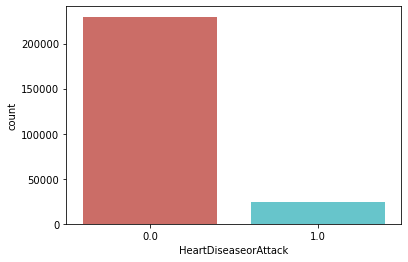

In [3]:
sns.countplot(x='HeartDiseaseorAttack',data=data,palette='hls')
plt.show()

## Criando as funções para a Regressão Logística

### Função sigmóide (logit)

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Função de custo

In [5]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

### Gradiente descendente

In [6]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

### Função de predição
    Maior que 0.5 é arredondada p/ 1, menor p/ 0.

In [7]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

## Transformando os dados
    pd.core.series.Series em np.ndarray

In [19]:
y = data['HeartDiseaseorAttack'].to_numpy(dtype ='int')
y = y[:,np.newaxis] #transforma y em um vetor coluna
X_1 = data['BMI'].to_numpy(dtype ='int')
X_1 = np.vstack((X_1))
X_2 = data['Age'].to_numpy(dtype ='int')
X_2 = np.vstack((X_2))
X = np.hstack((X_1,X_2))

[[40  9]
 [25  7]
 [28  9]
 ...
 [28  2]
 [23  7]
 [25  9]]
253680 253680


C:\Users\Bia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'BMI')

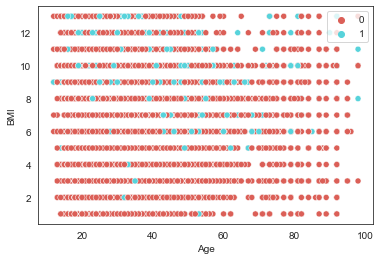

In [22]:
sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1),palette='hls');
plt.xlabel("Age")
plt.ylabel("BMI")